In [91]:
import pandas as pd

df = pd.read_csv('/Users/timothymartinmanaloto/Desktop/listingsEnglish.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.shape
df

,location,name,beds,date,price,rating
0,Private room in Makati,TKA 407: Fully Furnished Studio near Makati CBD,1 double bed,Sep 18 – 25,$16 night$16 per night,4.8 (49)
1,Condo in Manila,8 Adriatico with Manila Bay view Ermita,1 queen bed,Nov 15 – 22,$43 night$43 per night,4.64 (215)
2,Apartment in Makati,TKA 408: Fully Furnished Studio near Makati CBD,1 double bed,Sep 19 – 26,$16 night$16 per night,4.76 (45)
3,Apartment in Makati,Top Location! Makati Greenbelt Laureano Di Trevi,1 queen bed,Oct 23 – 30,$16 night$16 per night,4.4 (10)
4,Condo in Pasay,"One Bedroom Condo in Roxas Boulevard, Pasay City",1 bed,Dec 30 – Jan 6,$22 night$22 per night,4.8 (286)
...,...,...,...,...,...,...
295,Condo in Manila,"Cozy 1-bedroom unit in Taft Ave, Manila! (2-3 ...",2 beds,Jan 7 – 14,$17 night$17 per night,5.0 (25)
296,Condo in Quezon City,Staycation: Quezon City Studio Unit (Wifi+Netf...,2 beds,Sep 22 – 29,$19 night$19 per night,4.87 (15)
297,Condo in Mandaluyong,Studio @Edsa unliWifi Netflix,1 bed,Jan 31 – Feb 7,$19 night$19 per night,5.0 (5)
298,Condo in Makati,Studio at the Heart of the Makati CBD + NETFLIX,2 beds,Nov 15 – 22,$35 night$35 per night,4.84 (62)


In [92]:
df['price'] = df['price'].str[1:4].replace(' /', '')
df['price'] = df['price'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df['price'] = pd.to_numeric(df['price'])
df = df.rename(columns={'rating':'rating_(#_of_reviews)','price':'price_per_night_($)'})
df

,location,name,beds,date,price_per_night_($),rating_(#_of_reviews)
0,Private room in Makati,TKA 407: Fully Furnished Studio near Makati CBD,1 double bed,Sep 18 – 25,16,4.8 (49)
1,Condo in Manila,8 Adriatico with Manila Bay view Ermita,1 queen bed,Nov 15 – 22,43,4.64 (215)
2,Apartment in Makati,TKA 408: Fully Furnished Studio near Makati CBD,1 double bed,Sep 19 – 26,16,4.76 (45)
3,Apartment in Makati,Top Location! Makati Greenbelt Laureano Di Trevi,1 queen bed,Oct 23 – 30,16,4.4 (10)
4,Condo in Pasay,"One Bedroom Condo in Roxas Boulevard, Pasay City",1 bed,Dec 30 – Jan 6,22,4.8 (286)
...,...,...,...,...,...,...
295,Condo in Manila,"Cozy 1-bedroom unit in Taft Ave, Manila! (2-3 ...",2 beds,Jan 7 – 14,17,5.0 (25)
296,Condo in Quezon City,Staycation: Quezon City Studio Unit (Wifi+Netf...,2 beds,Sep 22 – 29,19,4.87 (15)
297,Condo in Mandaluyong,Studio @Edsa unliWifi Netflix,1 bed,Jan 31 – Feb 7,19,5.0 (5)
298,Condo in Makati,Studio at the Heart of the Makati CBD + NETFLIX,2 beds,Nov 15 – 22,35,4.84 (62)


In [93]:
#Create empty list where we are going to put the name strings
names=[]
#Getting name string from 'name' column and appending it to the empty list
for name in df.name:
    names.append(name)
#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s
#Create empty list where we are going to count the words
names_count = []
#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

[Text(0, 0, 'studio'),
 Text(1, 0, 'makati'),
 Text(2, 0, 'in'),
 Text(3, 0, 'furnished'),
 Text(4, 0, 'near'),
 Text(5, 0, 'view'),
 Text(6, 0, 'at'),
 Text(7, 0, 'tka'),
 Text(8, 0, 'wifi'),
 Text(9, 0, 'unit'),
 Text(10, 0, 'cbd'),
 Text(11, 0, 'the'),
 Text(12, 0, 'jazz'),
 Text(13, 0, 'cozy'),
 Text(14, 0, '&'),
 Text(15, 0, 'fully'),
 Text(16, 0, 'of'),
 Text(17, 0, 'city'),
 Text(18, 0, 'fast'),
 Text(19, 0, '1br'),
 Text(20, 0, 'balcony'),
 Text(21, 0, 'with'),
 Text(22, 0, 'manila'),
 Text(23, 0, '1'),
 Text(24, 0, 'br')]

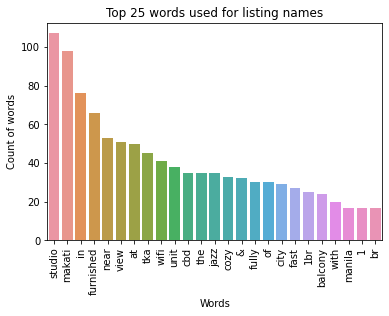

In [94]:
#Top 25 words used for listings
import seaborn as sns
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_bar = sns.barplot(x='Words',y='Counts', data = word_count_data)
word_count_bar.set_title('Top 25 words used for listing names')
word_count_bar.set_ylabel('Count of words')
word_count_bar.set_xlabel('Words')
word_count_bar.set_xticklabels(word_count_bar.get_xticklabels(),rotation = 90)

In [95]:
# Average price of each room type
df[['beds','price_per_night_($)']].groupby('beds')\
  .agg(['mean','count'])\
    .sort_values(by=('price_per_night_($)','count'), ascending=False).round(2)

price_per_night_($)      
                            mean count
beds                                  
1 double bed               18.76    78
2 beds                     35.01    68
1 queen bed                30.30    66
1 bed                      44.28    60
1 sofa bed                 30.00    15
1 single bed               10.00    13

In [96]:
df[['rating','number_of_reviews']] = df['rating_(#_of_reviews)'].str.split(' ',expand=True)
df['number_of_reviews'] = df['number_of_reviews'].str.replace(r'[()]',"") 
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'])
df = df.drop(['rating_(#_of_reviews)'],axis=1)
df

/var/folders/wy/1_zdt_xn7v7fhg_4lkgc_dv40000gn/T/ipykernel_18988/3576837539.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['number_of_reviews'] = df['number_of_reviews'].str.replace(r'[()]',"")


,location,name,beds,date,price_per_night_($),rating,number_of_reviews
0,Private room in Makati,TKA 407: Fully Furnished Studio near Makati CBD,1 double bed,Sep 18 – 25,16,4.8,49
1,Condo in Manila,8 Adriatico with Manila Bay view Ermita,1 queen bed,Nov 15 – 22,43,4.64,215
2,Apartment in Makati,TKA 408: Fully Furnished Studio near Makati CBD,1 double bed,Sep 19 – 26,16,4.76,45
3,Apartment in Makati,Top Location! Makati Greenbelt Laureano Di Trevi,1 queen bed,Oct 23 – 30,16,4.4,10
4,Condo in Pasay,"One Bedroom Condo in Roxas Boulevard, Pasay City",1 bed,Dec 30 – Jan 6,22,4.8,286
...,...,...,...,...,...,...,...
295,Condo in Manila,"Cozy 1-bedroom unit in Taft Ave, Manila! (2-3 ...",2 beds,Jan 7 – 14,17,5.0,25
296,Condo in Quezon City,Staycation: Quezon City Studio Unit (Wifi+Netf...,2 beds,Sep 22 – 29,19,4.87,15
297,Condo in Mandaluyong,Studio @Edsa unliWifi Netflix,1 bed,Jan 31 – Feb 7,19,5.0,5
298,Condo in Makati,Studio at the Heart of the Makati CBD + NETFLIX,2 beds,Nov 15 – 22,35,4.84,62


In [103]:
#ratings based on reviews

df.nlargest(20, 'number_of_reviews')
df.beds.value_counts(normalize=True)

1 double bed    0.260000
2 beds          0.226667
1 queen bed     0.220000
1 bed           0.200000
1 sofa bed      0.050000
1 single bed    0.043333
Name: beds, dtype: float64